# Amazon Reviews for SA fine-grained 5 clases CSV


In [85]:
import seaborn as sb
import matplotlib.pyplot as plt

import pandas as pd
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer

#from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Margarida
[nltk_data]     Viera\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


## Dataset


In [80]:
train_df = pd.read_csv('../docs/train.csv')
test_df = pd.read_csv('../docs/train.csv')


In [81]:
# Shorten the number of samples from every class_index type (n = 200000)

classes = []
n_samples = 100

for i in range(1, 6):
    classes.append(train_df.query(f'class_index == {i}').sample(n=n_samples))

train_df_s = pd.concat(classes)
train_df_s.reset_index(drop=True, inplace=True)


## Exploratory analysis


In [82]:
# checking for presence of null values that might interfere with data processing
train_df_s.isna().sum()


class_index     0
review_title    0
review_text     0
dtype: int64

Text(0.5, 1.0, 'Rating Distribution')

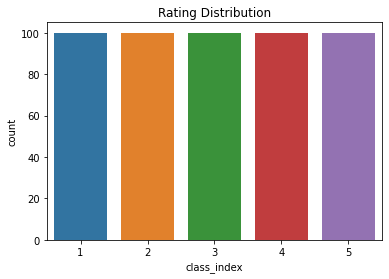

In [83]:
sb.countplot(x='class_index', data=train_df_s)
plt.title('Rating Distribution')


## Preprocess data


In [86]:
train_df_s['review_full'] = train_df_s['review_title']

stop_words = set(nltk.corpus.stopwords.words('english'))

stemmer = PorterStemmer()

# traversing all dataframe's rows
for i in range(train_df_s.shape[0]):

    # process review's title
    title = re.sub('[^a-zA-Z]', ' ', train_df_s['review_title'][i])
    title_tokens = word_tokenize(title)
    title_stems = [stemmer.stem(w) for w in title_tokens if w not in stop_words] 
    train_df_s['review_title'][i] = ' '.join(title_stems)

    # process review's text
    text = re.sub("[^a-zA-Z]", " ", train_df_s['review_text'][i])
    text_tokens = word_tokenize(text)
    text_stems = [stemmer.stem(w) for w in text_tokens if w not in stop_words]
    train_df_s['review_text'][i] = ' '.join(text_stems)

    train_df_s['review_full'][i] = f"{train_df_s['review_title'][i]} {train_df_s['review_text'][i]}"


C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\2434474119.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_s['review_title'][i] = ' '.join(title_stems)
C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\2434474119.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_s['review_text'][i] = ' '.join(text_stems)
C:\Users\Margarida Viera\AppData\Local\Temp\ipykernel_8372\2434474119.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [87]:
train_df_s


,class_index,review_title,review_text,review_full
0,1,two thumb,read review bought leatherman wave gerber susp...,two thumb read review bought leatherman wave g...
1,1,surround idiot,i surround mostli idiot i work read idiot acti...,surround idiot i surround mostli idiot i work ...
2,1,sure work cost,ye magic work parent teach child there much be...,sure work cost ye magic work parent teach chil...
3,1,realli poor new user,i tend extra gener comment comput book today i...,realli poor new user i tend extra gener commen...
4,1,expir april,thi pack deal total wast money the pad i recei...,expir april thi pack deal total wast money the...
...,...,...,...,...
495,5,pleas someon publish book,i love book much young child final fell apart ...,pleas someon publish book i love book much you...
496,5,great read,now good book repairman jack fix thing leaki f...,great read now good book repairman jack fix th...
497,5,a must have for coco fan,thi album favorit coco album right along first...,a must have for coco fan thi album favorit coc...
498,5,harold maud,wonder abl lay hand in documentari film made t...,harold maud wonder abl lay hand in documentari...


## Nabo bais


## Neural Minds


## Tree com Ramos
